#Naive Bayes Algorithm

**p(a/b)=p(b/a)p(a)/p(b)**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('titanic.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.drop(['PassengerId','Name','Cabin','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [ ]:
inputs=df.drop('Survived',axis=1)
target=df.Survived
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [ ]:
gendumy=pd.get_dummies(inputs.Sex)
gendumy.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
inputs=pd.concat([inputs,gendumy],axis=1)

In [ ]:
inputs.drop(['Sex'],axis=1,inplace=True)

In [ ]:
inputs['Age'].fillna(inputs['Age'].median(),inplace=True)
inputs

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
886,2,27.0,13.0000,0,1
887,1,19.0,30.0000,1,0
888,3,28.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [ ]:
inputs.isnull().sum()

Pclass    0
Age       0
Fare      0
female    0
male      0
dtype: int64

In [ ]:
inputs.columns[inputs.isna().any()]

Index([], dtype='object')

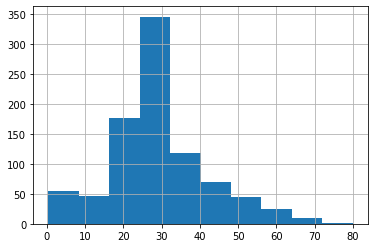

In [ ]:
inputs['Age'].hist()

In [ ]:
inputs.drop_duplicates()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1
...,...,...,...,...,...
885,3,39.0,29.1250,1,0
887,1,19.0,30.0000,1,0
888,3,28.0,23.4500,1,0
889,1,26.0,30.0000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [ ]:
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
model.predict(x_test[:10])

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
model.score(x_test,y_test)

0.7798507462686567

In [ ]:
model.predict([[2,19,30,0,1]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

##Deployment of model

In [ ]:
import pickle

In [ ]:
file="deployer.sav"

In [ ]:
pickle.dump(model,open("deployer.sav",'wb'))